# Exploratory Data Analysis
__author__ = Kyohoon

## Pre-setting

In [106]:
# Import modules
import os
import pickle
import itertools
import numpy as np
import pandas as pd
from collections import Counter

# NLP modules
from konlpy.tag import Mecab, Okt
from khaiii import khaiii

# Visualization modules
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Factor Analysis (PCA)
from sklearn.decomposition import PCA

# ANOVA modules
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

# Chi square test
from scipy.stats import chi2_contingency

# Visualization setting
sns.set(style="ticks", palette="Set1")
plt.rcParams["font.family"] = 'NanumGothic'

In [6]:
# Read data
original_dat = pd.read_csv('./data/survey_answer_595.csv')
answer_dat = pd.read_csv('./data/survey_answer_encoded.csv')
text_dat = pd.read_csv('./data/survey_answer_text.csv')

with open('./data/argument.pkl', 'rb') as f:
    info_dict = pickle.load(f)

## Text analysis

### Pre-processing

In [16]:
mecab = Mecab()
okt = Okt()
khaiii_api = khaiii.KhaiiiApi()

# 성별 별 텍스트
male_text = original_dat[original_dat['1. 성별']=='남성']['<유미의 세포들> 전시 관람에 대해 느낀 점을 자유롭게 남겨주세요.'].dropna().tolist()
female_text = original_dat[original_dat['1. 성별']=='여성']['<유미의 세포들> 전시 관람에 대해 느낀 점을 자유롭게 남겨주세요.'].dropna().tolist()
teenage_text = original_dat[original_dat['2. 연령대']=='10대']['<유미의 세포들> 전시 관람에 대해 느낀 점을 자유롭게 남겨주세요.'].dropna().tolist()
twenties_text = original_dat[original_dat['2. 연령대']=='20대']['<유미의 세포들> 전시 관람에 대해 느낀 점을 자유롭게 남겨주세요.'].dropna().tolist()
other_age_text = original_dat[original_dat['2. 연령대']!='20대'][original_dat['2. 연령대']!='10대']['<유미의 세포들> 전시 관람에 대해 느낀 점을 자유롭게 남겨주세요.'].dropna().tolist()
total_text = text_dat['text'].tolist()

In [18]:
def khaiii_nouns(api, sentence):
    sentence_list = list()
    try:
        for parsed_words in api.analyze(sentence):
            for seg in parsed_words.morphs:
                if seg.tag[0] == 'N':
                    sentence_list.append(seg.lex)
    except:
        sentence_list = list()
    return sentence_list

def khaiii_morphs(api, sentence):
    sentence_list = list()
    try:
        for parsed_words in api.analyze(sentence):
            for seg in parsed_words.morphs:
                sentence_list.append(seg.lex)
    except:
        sentence_list = list()
    return sentence_list

def top_k_words(counter, p):
    top_list = list()
    for k, v in counter.items():
        if v >= np.quantile(list(counter.values()), (1-p)):
            top_list.append((k, v))
    return top_list

In [34]:
male_text_morphs = list(itertools.chain(*[okt.morphs(x) for x in male_text]))
female_text_morphs = list(itertools.chain(*[okt.morphs(x) for x in female_text]))
teenage_text_morphs = list(itertools.chain(*[okt.morphs(x) for x in teenage_text]))
twenties_text_morphs = list(itertools.chain(*[okt.morphs(x) for x in twenties_text]))
other_age_text_morphs = list(itertools.chain(*[okt.morphs(x) for x in other_age_text]))
total_text_morphs = list(itertools.chain(*[okt.morphs(x) for x in total_text]))

male_text_morphs_khaiii = list(itertools.chain(*[khaiii_morphs(khaiii_api, x) for x in male_text]))
female_text_morphs_khaiii = list(itertools.chain(*[khaiii_morphs(khaiii_api, x) for x in female_text]))
teenage_text_morphs_khaiii = list(itertools.chain(*[khaiii_morphs(khaiii_api, x) for x in teenage_text]))
twenties_text_morphs_khaiii = list(itertools.chain(*[khaiii_morphs(khaiii_api, x) for x in twenties_text]))
other_age_text_morphs_khaiii = list(itertools.chain(*[khaiii_morphs(khaiii_api, x) for x in other_age_text]))
total_text_morphs_khaiii = list(itertools.chain(*[khaiii_morphs(khaiii_api, x) for x in total_text]))

male_text_nouns = list(itertools.chain(*[okt.nouns(x) for x in male_text]))
female_text_nouns = list(itertools.chain(*[okt.nouns(x) for x in female_text]))
teenage_text_nouns = list(itertools.chain(*[okt.nouns(x) for x in teenage_text]))
twenties_text_nouns = list(itertools.chain(*[okt.nouns(x) for x in twenties_text]))
other_age_text_nouns = list(itertools.chain(*[okt.nouns(x) for x in other_age_text]))
total_text_nouns = list(itertools.chain(*[okt.nouns(x) for x in total_text]))

male_text_nouns_khaiii = list(itertools.chain(*[khaiii_nouns(khaiii_api, x) for x in male_text]))
female_text_nouns_khaiii = list(itertools.chain(*[khaiii_nouns(khaiii_api, x) for x in female_text]))
teenage_text_nouns_khaiii = list(itertools.chain(*[khaiii_nouns(khaiii_api, x) for x in teenage_text]))
twenties_text_nouns_khaiii = list(itertools.chain(*[khaiii_nouns(khaiii_api, x) for x in twenties_text]))
other_age_text_nouns_khaiii = list(itertools.chain(*[khaiii_nouns(khaiii_api, x) for x in other_age_text]))
total_text_nouns_khaiii = list(itertools.chain(*[khaiii_nouns(khaiii_api, x) for x in total_text]))

In [55]:
male_counter, female_counter = Counter(), Counter()
teenage_counter, twenties_counter, other_age_counter = Counter(), Counter(), Counter()
total_counter = Counter()

male_counter.update(male_text_nouns_khaiii)
female_counter.update(female_text_nouns_khaiii)
teenage_counter.update(teenage_text_nouns_khaiii)
twenties_counter.update(twenties_text_nouns_khaiii)
other_age_counter.update(other_age_text_nouns_khaiii)
total_counter.update(total_text_nouns_khaiii)

male_top_list = top_k_words(male_counter, 0.1)
female_top_list = top_k_words(female_counter, 0.2)
teenage_top_list = top_k_words(teenage_counter, 0.3)
twenties_top_list = top_k_words(twenties_counter, 0.2)
other_age_top_list = top_k_words(other_age_counter, 0.3)
total_top_list = top_k_words(total_counter, 0.1)

### 품사 태깅 결과

In [37]:
print('품사 태깅 결과')
print('KoNLPy POS Tagging:')
print(okt.pos(total_text[3]))
print('-'*100)
print()

print('Khaiii POS Tagging:')
for word in khaiii_api.analyze(total_text[3]):
    print(word)

품사 태깅 결과
KoNLPy POS Tagging:
[('오랜', 'Modifier'), ('만', 'Noun'), ('에', 'Josa'), ('싱그러', 'Adjective'), ('움', 'Noun'), ('을', 'Josa'), ('느낄', 'Verb'), ('수', 'Noun'), ('있어', 'Adjective'), ('좋았습니다', 'Adjective'), ('.', 'Punctuation'), ('감사합니다', 'Verb'), ('.', 'Punctuation'), (':)', 'Punctuation')]
----------------------------------------------------------------------------------------------------

Khaiii POS Tagging:
오랜만에	오랜만/NNG + 에/JKB
싱그러움을	싱그럽/VA + 움/NNG + 을/JKO
느낄	느끼/VV + ㄹ/ETM
수	수/NNB
있어	있/VV + 어/EC
좋았습니다.	좋/VA + 았/EP + 습니다/EF + ./SF
감사합니다.	감사/NNG + 하/XSV + ㅂ니다/EF + ./SF
:)	:/SP + )/SS


### 단어 빈도수 확인 (Wordcloud)

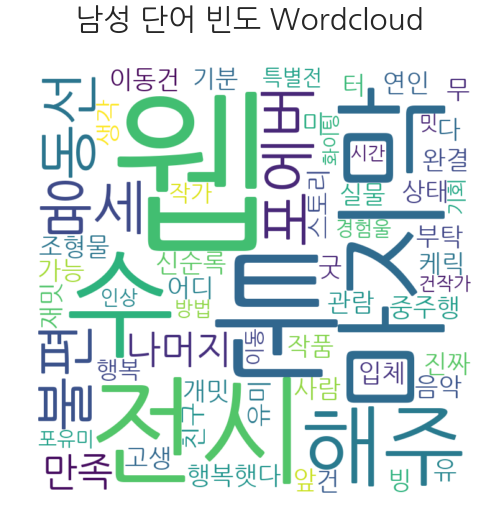

In [64]:
wordcloud = WordCloud(
    font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf',
    width = 700,
    height = 700,
    background_color="white",
)

wordcloud = wordcloud.generate_from_frequencies({k: v for k, v in male_top_list})
plt.figure(figsize=(8, 8))
plt.title('남성 단어 빈도 Wordcloud \n', size=30)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

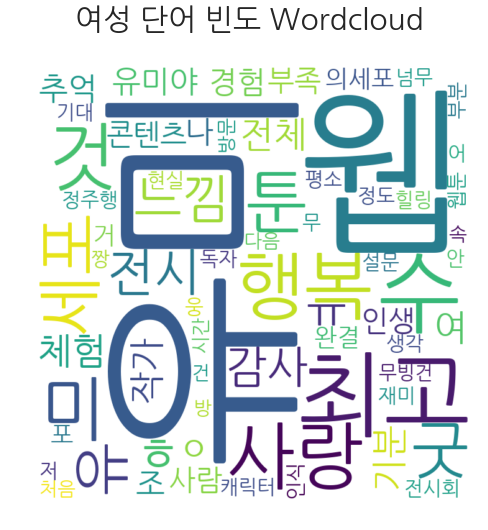

In [66]:
wordcloud = WordCloud(
    font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf',
    width = 700,
    height = 700,
    background_color="white",
)

wordcloud = wordcloud.generate_from_frequencies({k: v for k, v in female_top_list})
plt.figure(figsize=(8, 8))
plt.title('여성 단어 빈도 Wordcloud \n', size=30)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

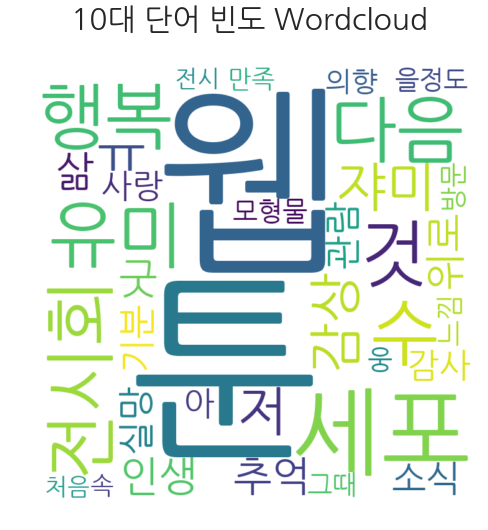

In [67]:
wordcloud = WordCloud(
    font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf',
    width = 700,
    height = 700,
    background_color="white",
)

wordcloud = wordcloud.generate_from_frequencies({k: v for k, v in teenage_top_list})
plt.figure(figsize=(8, 8))
plt.title('10대 단어 빈도 Wordcloud \n', size=30)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

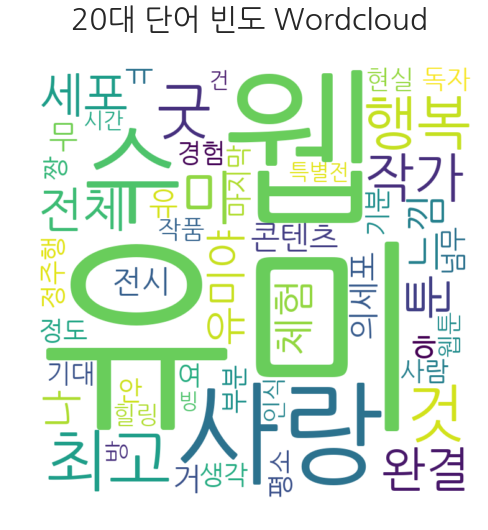

In [181]:
wordcloud = WordCloud(
    font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf',
    width = 700,
    height = 700,
    background_color="white",
)

wordcloud = wordcloud.generate_from_frequencies({k: v for k, v in twenties_top_list})
plt.figure(figsize=(8, 8))
plt.title('20대 단어 빈도 Wordcloud \n', size=30)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

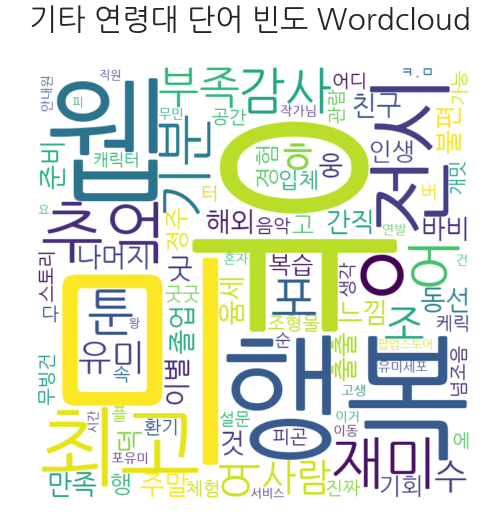

In [70]:
wordcloud = WordCloud(
    font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf',
    width = 700,
    height = 700,
    background_color="white",
)

wordcloud = wordcloud.generate_from_frequencies({k: v for k, v in other_age_top_list})
plt.figure(figsize=(8, 8))
plt.title('기타 연령대 단어 빈도 Wordcloud \n', size=30)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

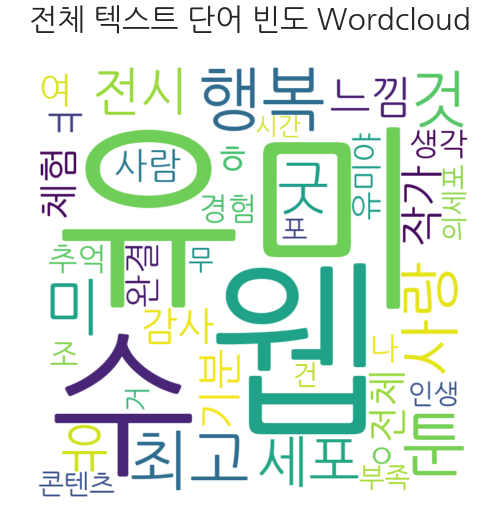

In [71]:
wordcloud = WordCloud(
    font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf',
    width = 700,
    height = 700,
    background_color="white",
)

wordcloud = wordcloud.generate_from_frequencies({k: v for k, v in total_top_list})
plt.figure(figsize=(8, 8))
plt.title('전체 텍스트 단어 빈도 Wordcloud \n', size=30)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

* 텍스트 전처리 관련 내용 추가할만한 것들

![drawing](img/conditional_bert.png)
- Conditional BERT를 활용하여 Data Augmentation 실시

'웹툰을 좋아하는 저로써 너무 즐거운 추억이었습니다.'

-> '만화를 좋아하는 저로써는 너무 즐거운 추억이었습니다.'

- 인터넷 용어들 정제 및 오타 정제를 위한 Text style transfer Autoencoder모델

'너무 즐겁고 마음이 몽ㄱ,ㄹ몽글 해쟜아요. ㅎㅎ'

-> '너무 즐겁고 마음이 몽글몽글 해졌어요.'



## Factor Analysis

In [77]:
pca_dat = answer_dat[['tot_satisfy', 'sat_storytell', 'sat_mapping', 'sat_oled', 'sat_emotion',
                      'sat_conven', 'sat_safety', 'fat_move' ,'fat_dense', 'fat_tech', 'covid_freq']]

pca = PCA(n_components=3, whiten=True)
X = np.array(pca_dat.dropna())
X_transformed  = pca.fit_transform(X)

In [78]:
pd.DataFrame(pca.components_.transpose())

,0,1,2
0,0.375997,-0.196881,-0.297691
1,0.394307,-0.119694,0.184516
2,0.376341,-0.103259,0.278664
3,0.393272,-0.100651,0.194565
4,0.303470,0.124093,0.450898
5,0.343167,-0.079839,-0.661063
6,0.391823,-0.015495,-0.092121
7,0.120158,0.491714,-0.106737
8,0.119904,0.658116,-0.076457
9,0.114537,0.469036,-0.052854


- 주성분1: (0~6번) 전반적인 만족도
- 주성분2: (7~9번) 전반적인 피로 수준
- 주성분3: 해석 불가능... 그냥 2번까지만 쓰셈

Text(0,0.5,'Percentage of Explained Variance')

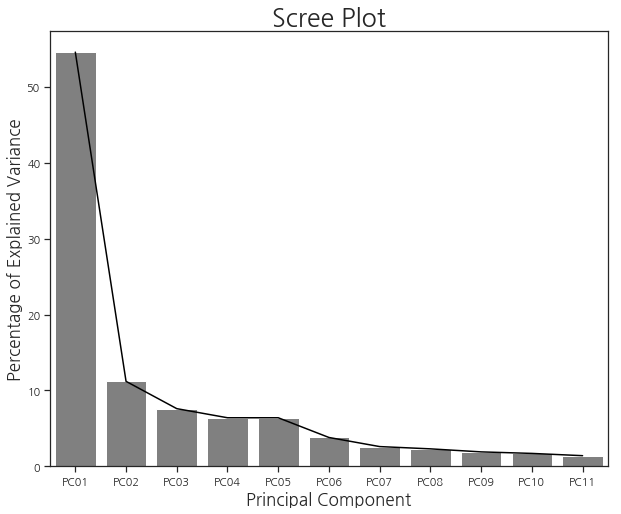

In [79]:
pca = PCA(n_components=11, whiten=True)
X = np.array(pca_dat.dropna())
pca.fit(X)

per_var = np.round(pca.explained_variance_ratio_* 100, decimals=1)
labels = ['PC0' + str(x) if x <= 9 else 'PC' + str(x) for x in range(1, len(per_var)+1)]

plt.figure(figsize=(10,8))
plt.title('Scree Plot', size=25)
sns.lineplot(x=labels, y=per_var, color='black', markers=True)
sns.barplot(x=labels, y=per_var, order=labels, color='gray')
plt.xlabel('Principal Component', size=17)
plt.ylabel('Percentage of Explained Variance', size=17)

- Scree plot상 1번만 쓰는게 맞긴 한데 대충 Thumbs rule 언급하면서 2번까지 쓴다고 하면 될듯

In [81]:
pca_vis_dat = pd.DataFrame(X_transformed)
pca_vis_dat.columns = ['PC1', 'PC2', 'PC3']
pca_vis_dat['sex'] = answer_dat['sex']
pca_vis_dat['age'] = answer_dat['age']
pca_vis_dat['job'] = answer_dat['job']

굳이 해석 하자면 피로가 높은 사람들 중 만족한 사람은 없다 (오른쪽 위가 많이 비어있기 때문)


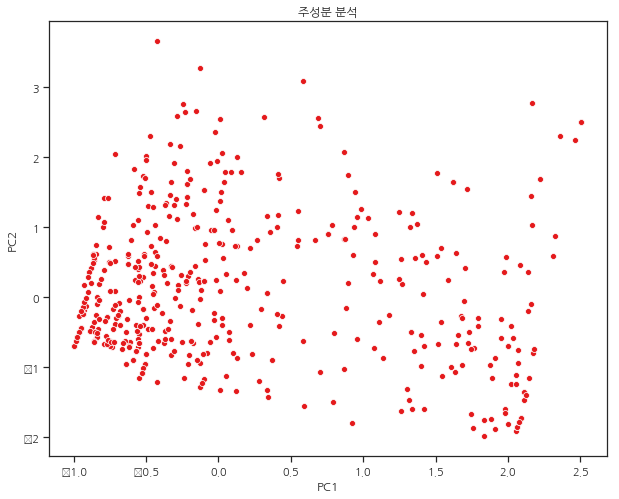

In [87]:
plt.figure(figsize=(10,8))
plt.title('주성분 분석')
sns.scatterplot('PC1', 'PC2', data=pca_vis_dat)
print('굳이 해석 하자면 피로가 높은 사람들 중 만족한 사람은 없다 (오른쪽 위가 많이 비어있기 때문)')

해석 불가능...


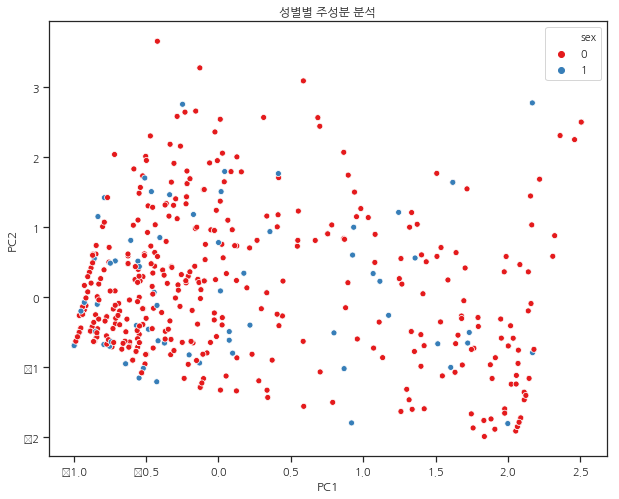

In [84]:
plt.figure(figsize=(10,8))
plt.title('성별별 주성분 분석')
sns.scatterplot('PC1', 'PC2', hue='sex', data=pca_vis_dat)
print('해석 불가능...')

해석 불가능...


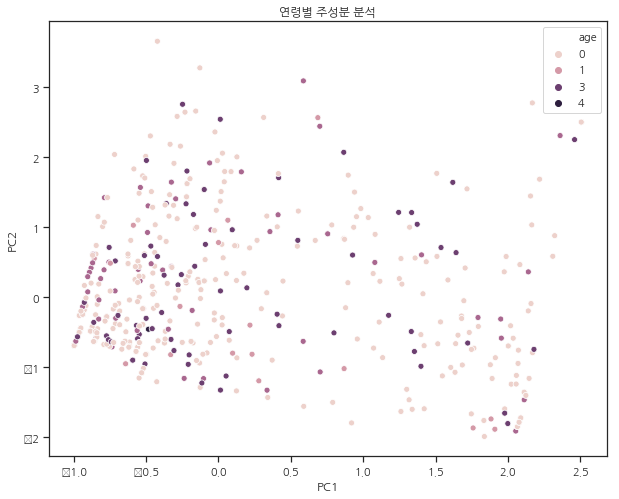

In [85]:
plt.figure(figsize=(10,8))
plt.title('연령별 주성분 분석')
sns.scatterplot('PC1', 'PC2', hue='age', data=pca_vis_dat)
print('해석 불가능...')

## Text writer analysis

In [88]:
vis_dat = pd.DataFrame()
vis_dat['sex'] = ['여성' if x==0 else '남성' for x in answer_dat['sex']]
vis_dat['writer'] = [True if x != 0 else False for x in answer_dat.fillna(0)['text']]
vis_dat['age'] = original_dat['2. 연령대']
vis_dat['tot_satisfy'] = original_dat['1. 본 전시에 대한 전체 만족도는 어느정도 인가요?']
vis_dat['revisit'] = original_dat['2. 본 전시를 재관람 할 의향이 있으신가요?']
vis_dat['recommend'] = original_dat['3. 본 전시를 주변 사람에게  추천할 의향이 있으신가요?']

[None, None, None, None]

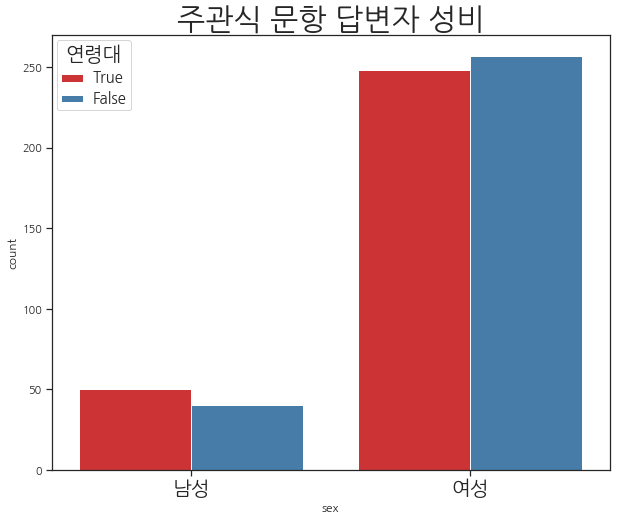

In [89]:
plt.figure(figsize=(10,8))
plt.title('주관식 문항 답변자 성비', size=30)
ax = sns.countplot(x='sex', data=vis_dat, hue='writer', order=['남성', '여성'], hue_order=[True, False])
plt.xticks(size=20)
ax.legend_.set_title('연령대')
plt.setp(ax.get_legend().get_title(), fontsize='20')
plt.setp(ax.get_legend().get_texts(), fontsize='15')

[Text(0,0,'매우 만족'),
 Text(0,0,'만족'),
 Text(0,0,'보통'),
 Text(0,0,'불만족'),
 Text(0,0,'매우 불만족')]

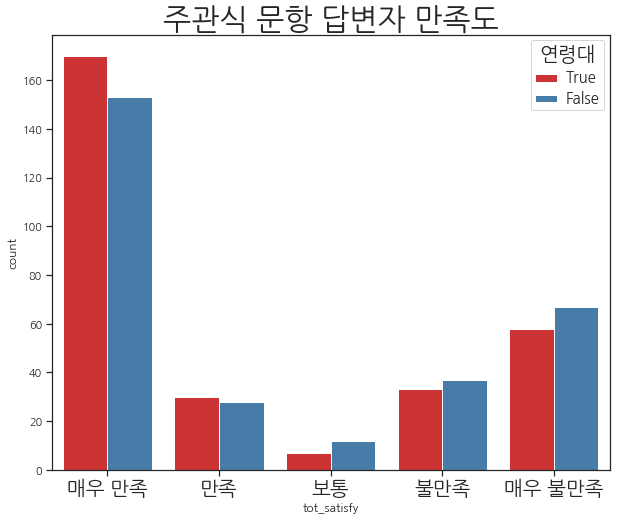

In [90]:
plt.figure(figsize=(10,8))
plt.title('주관식 문항 답변자 만족도', size=30)
ax = sns.countplot(x='tot_satisfy', data=vis_dat, hue='writer', hue_order=[True, False])
plt.xticks(size=20)
ax.legend_.set_title('연령대')
plt.setp(ax.get_legend().get_title(), fontsize='20')
plt.setp(ax.get_legend().get_texts(), fontsize='15')
ax.set_xticklabels(['매우 만족', '만족', '보통' ,'불만족', '매우 불만족'])

- 원래는 boxplot을 그리는게 일반적이지만, 애초에 범주형 자료로 ANOVA니 특징을 살피라느니 자체가 이상하기 때문에 그냥 Bar chat씀

In [95]:
print('만족도 & 글 작성 여부 ANOVA')

tot_satisfy2 = list()

for x in vis_dat['tot_satisfy']:
    if x == 1:
        tot_satisfy2.append(5)
    if x == 2:
        tot_satisfy2.append(4)
    if x == 3:
        tot_satisfy2.append(3)
    if x == 4:
        tot_satisfy2.append(2)
    if x == 5:
        tot_satisfy2.append(1)

vis_dat['tot_satisfy2'] = tot_satisfy2
df = pd.DataFrame(vis_dat, columns=['tot_satisfy2', 'writer'])    

model = ols('tot_satisfy2 ~ C(writer)', df).fit()

print(anova_lm(model))
print()
print('0.16으로 P-Value가 0.05보다 크므로 통계적으로 유의미하게 차이가 나지 않음')

              df       sum_sq   mean_sq         F    PR(>F)
C(writer)    1.0     5.528676  5.528676  1.967127  0.161276
Residual   593.0  1666.646114  2.810533       NaN       NaN

0.16으로 P-Value가 0.05보다 크므로 통계적으로 유의미하게 차이가 나지 않음


In [112]:
chi_res  = chi2_contingency(pd.crosstab(vis_dat['revisit'], vis_dat['writer']))
print('Chi2 Statistic: {}, p-value: {}'.format(chi_res[0], chi_res[1]))
print()
print('0.34로 P-Value가 0.05보다 크므로 통계적으로 유의미하게 차이가 나지 않음')

Chi2 Statistic: 0.9115202853871133, p-value: 0.339711363824994

0.34로 P-Value가 0.05보다 크므로 통계적으로 유의미하게 차이가 나지 않음


- 카이제곱, ANOVA, 적합성, 등등 다 어차피 통과 안됨 (당연하게도)
- 사기 쳐서 유의미함! 이라고 하던가 솔직하게 차이 안남 이라고 하던가 아니면 그림만 보여주고 보다시피 차이남! 이라고 하던가

## Revisit analysis

Chi2 Statistic: 13.414368213314997, p-value: 0.009418954235388894

0.009으로 P-Value가 0.05보다 작으므로 통계적으로 유의미하게 차이가 남


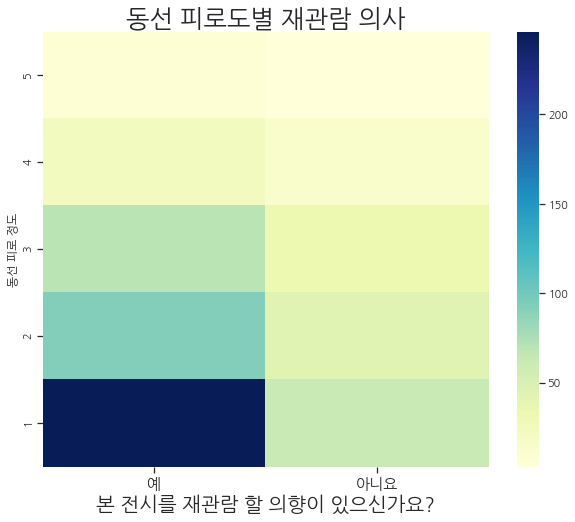

In [148]:
plt.figure(figsize=(10,8))
plt.title('동선 피로도별 재관람 의사', size=25)
ax = sns.heatmap(answer_dat.groupby(['fat_move', 'revisit']).size().unstack().sort_index(ascending=False), cmap='YlGnBu')
ax.set_xticklabels(['예', '아니요'])
plt.xlabel('본 전시를 재관람 할 의향이 있으신가요?', size=20)
plt.xticks(size=15)
plt.ylabel('동선 피로 정도', size=12)

chi_res  = chi2_contingency(pd.crosstab(answer_dat['revisit'], answer_dat['fat_move']))
print('Chi2 Statistic: {}, p-value: {}'.format(chi_res[0], chi_res[1]))
print()
print('0.009으로 P-Value가 0.05보다 작으므로 통계적으로 유의미하게 차이가 남')

Chi2 Statistic: 4.457132206925587, p-value: 0.3476607970732027

0.34으로 P-Value가 0.05보다 크므로 통계적으로 유의미하게 차이가 남


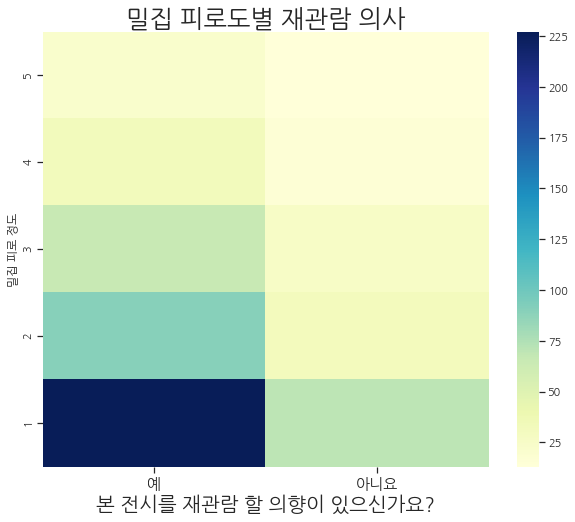

In [147]:
ax = plt.figure(figsize=(10,8))
ax = plt.title('밀집 피로도별 재관람 의사', size=25)
ax = sns.heatmap(answer_dat.groupby(['fat_dense', 'revisit']).size().unstack().sort_index(ascending=False), cmap='YlGnBu')
ax.set_xticklabels(['예', '아니요'])
ax = plt.xlabel('본 전시를 재관람 할 의향이 있으신가요?', size=20)
ax = plt.xticks(size=15)
ax = plt.ylabel('밀집 피로 정도', size=12)

chi_res  = chi2_contingency(pd.crosstab(answer_dat['revisit'], answer_dat['fat_dense']))
print('Chi2 Statistic: {}, p-value: {}'.format(chi_res[0], chi_res[1]))
print()
print('0.34으로 P-Value가 0.05보다 크므로 통계적으로 유의미하게 차이가 나지 않음')

Chi2 Statistic: 10.264385377818602, p-value: 0.03620202201681504

0.04으로 P-Value가 0.05보다 작으므로 통계적으로 유의미하게 차이가 남


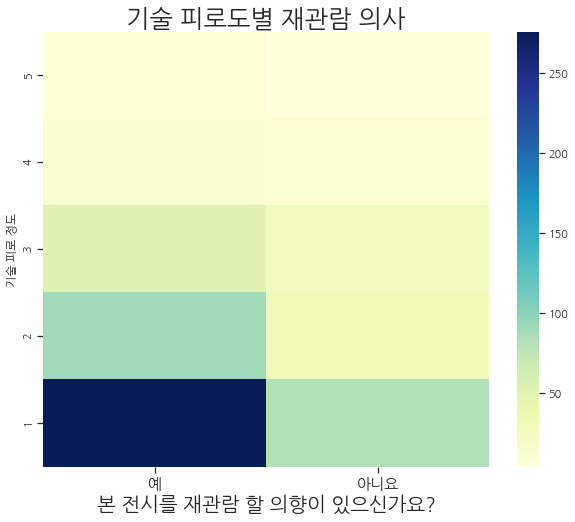

In [150]:
plt.figure(figsize=(10,8))
plt.title('기술 피로도별 재관람 의사', size=25)
ax = sns.heatmap(answer_dat.groupby(['fat_tech', 'revisit']).size().unstack().sort_index(ascending=False), cmap='YlGnBu')
ax.set_xticklabels(['예', '아니요'])
plt.xlabel('본 전시를 재관람 할 의향이 있으신가요?', size=20)
plt.xticks(size=15)
plt.ylabel('기술 피로 정도', size=12)

chi_res  = chi2_contingency(pd.crosstab(answer_dat['revisit'], answer_dat['fat_tech']))
print('Chi2 Statistic: {}, p-value: {}'.format(chi_res[0], chi_res[1]))
print()
print('0.04으로 P-Value가 0.05보다 작으므로 통계적으로 유의미하게 차이가 남')

## Covid effect analysis

                    df       sum_sq   mean_sq         F    PR(>F)
C(covid_effect)    1.0     1.343809  1.343809  0.476936  0.490084
Residual         593.0  1670.830981  2.817590       NaN       NaN

0.49으로 P-Value가 0.05보다 크므로 통계적으로 유의미하게 차이가 나지 않음


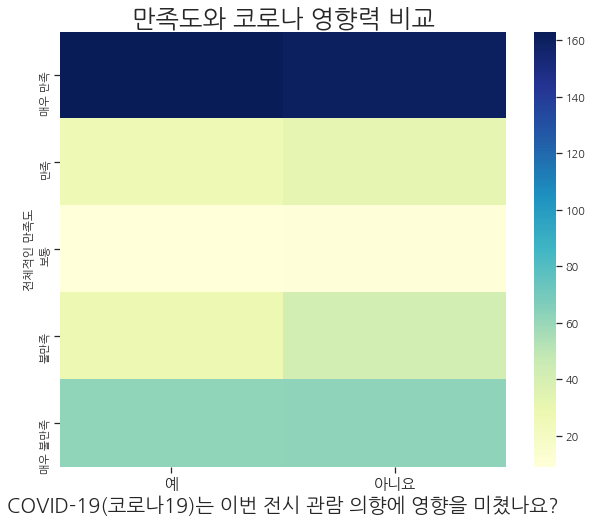

In [165]:
plt.figure(figsize=(10,8))
plt.title('만족도와 코로나 영향력 비교1', size=25)
ax = sns.heatmap(answer_dat.groupby(['tot_satisfy', 'covid_effect']).size().unstack(), cmap='YlGnBu')
ax.set_xticklabels(['예', '아니요'])
ax.set_yticklabels(['매우 만족', '만족', '보통' ,'불만족', '매우 불만족'])
plt.xlabel('COVID-19(코로나19)는 이번 전시 관람 의향에 영향을 미쳤나요?', size=20)
plt.xticks(size=15)
plt.ylabel('전체적인 만족도', size=12)

df = pd.DataFrame(answer_dat, columns=['covid_effect', 'tot_satisfy'])    
model = ols('tot_satisfy ~ C(covid_effect)', df).fit()

print(anova_lm(model))
print()
print('0.49으로 P-Value가 0.05보다 크므로 통계적으로 유의미하게 차이가 나지 않음')

                  df       sum_sq   mean_sq         F    PR(>F)
C(covid_freq)    4.0    33.630415  8.407604  3.027374  0.017298
Residual       590.0  1638.544375  2.777194       NaN       NaN

0.01으로 P-Value가 0.05보다 작으므로 통계적으로 유의미하게 차이가 남


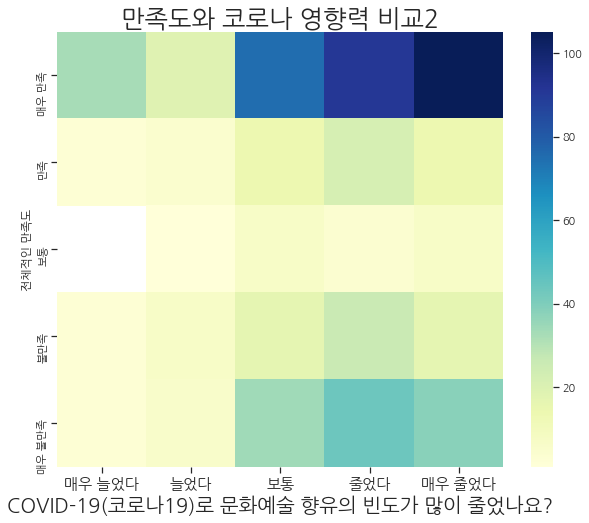

In [171]:
plt.figure(figsize=(10,8))
plt.title('만족도와 코로나 영향력 비교2', size=25)
ax = sns.heatmap(answer_dat.groupby(['tot_satisfy', 'covid_freq']).size().unstack(), cmap='YlGnBu')
ax.set_xticklabels(['매우 늘었다', '늘었다', '보통', '줄었다', '매우 줄었다'])
ax.set_yticklabels(['매우 만족', '만족', '보통' ,'불만족', '매우 불만족'])
plt.xlabel('COVID-19(코로나19)로 문화예술 향유의 빈도가 많이 줄었나요?', size=20)
plt.xticks(size=15)
plt.ylabel('전체적인 만족도', size=12)

df = pd.DataFrame(answer_dat, columns=['covid_freq', 'tot_satisfy'])    
model = ols('tot_satisfy ~ C(covid_freq)', df).fit()

print(anova_lm(model))
print()
print('0.01으로 P-Value가 0.05보다 작으므로 통계적으로 유의미하게 차이가 남')

In [179]:
covid_effecter_text_morphs = list(itertools.chain(*[okt.morphs(x) for x in answer_dat.query('covid_effect==0')['text'].dropna().to_list()]))
covid_non_effecter_text_morphs = list(itertools.chain(*[okt.morphs(x) for x in answer_dat.query('covid_effect==1')['text'].dropna().to_list()]))

covid_effecter_text_morphs_khaiii = list(itertools.chain(*[khaiii_morphs(khaiii_api, x) for x in answer_dat.query('covid_effect==0')['text'].dropna().to_list()]))
covid_non_effecter_text_morphs_khaiii = list(itertools.chain(*[khaiii_morphs(khaiii_api, x) for x in answer_dat.query('covid_effect==1')['text'].dropna().to_list()]))

covid_effecter_text_nouns = list(itertools.chain(*[okt.nouns(x) for x in answer_dat.query('covid_effect==0')['text'].dropna().to_list()]))
covid_non_effecter_text_nouns = list(itertools.chain(*[okt.nouns(x) for x in answer_dat.query('covid_effect==1')['text'].dropna().to_list()]))

covid_effecter_text_nouns_khaiii = list(itertools.chain(*[khaiii_nouns(khaiii_api, x) for x in answer_dat.query('covid_effect==0')['text'].dropna().to_list()]))
covid_non_effecter_text_nouns_khaiii = list(itertools.chain(*[khaiii_nouns(khaiii_api, x) for x in answer_dat.query('covid_effect==1')['text'].dropna().to_list()]))

covid_effecter_counter, covid_non_effecter_counter = Counter(), Counter()

covid_effecter_counter.update(covid_effecter_text_nouns_khaiii)
covid_non_effecter_counter.update(covid_non_effecter_text_nouns_khaiii)

covid_effecter_top_list = top_k_words(covid_effecter_counter, 0.2)
covid_non_effecter_top_list = top_k_words(covid_non_effecter_counter, 0.2)

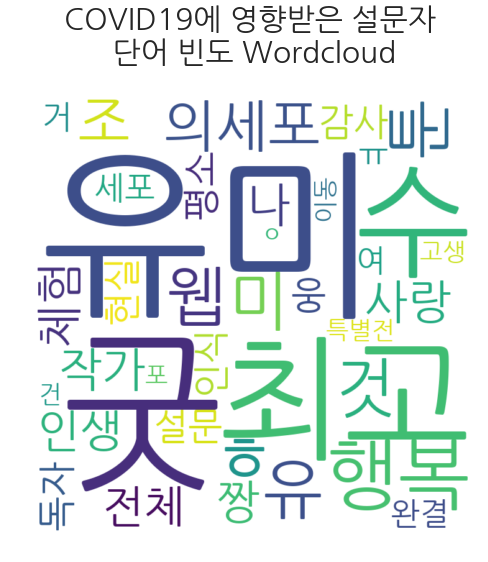

In [184]:
wordcloud = WordCloud(
    font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf',
    width = 700,
    height = 700,
    background_color="white",
)

wordcloud = wordcloud.generate_from_frequencies({k: v for k, v in covid_effecter_top_list})
plt.figure(figsize=(8, 8))
plt.title('COVID19에 영향받은 설문자 \n 단어 빈도 Wordcloud \n', size=30)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

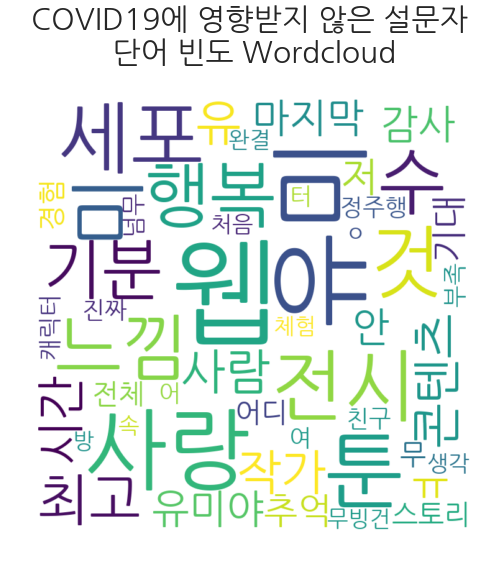

In [185]:
wordcloud = WordCloud(
    font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf',
    width = 700,
    height = 700,
    background_color="white",
)

wordcloud = wordcloud.generate_from_frequencies({k: v for k, v in covid_non_effecter_top_list})
plt.figure(figsize=(8, 8))
plt.title('COVID19에 영향받지 않은 설문자 \n 단어 빈도 Wordcloud \n', size=30)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()